In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload

import kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load Dating dataset
df_dating = pd.read_csv("datingTestSet2.txt", delim_whitespace=True, header=None)

ratio = 0.04
n_test = int(df_dating.shape[0] * ratio)
df_dating_train, df_dating_test = df_dating[:-n_test], df_dating[-n_test:]

X_train, Y_train = df_dating_train.drop(columns=[3]).to_numpy(), df_dating_train[3].to_numpy()
X_test, Y_test = df_dating_test.drop(columns=[3]).to_numpy(), df_dating_test[3].to_numpy()

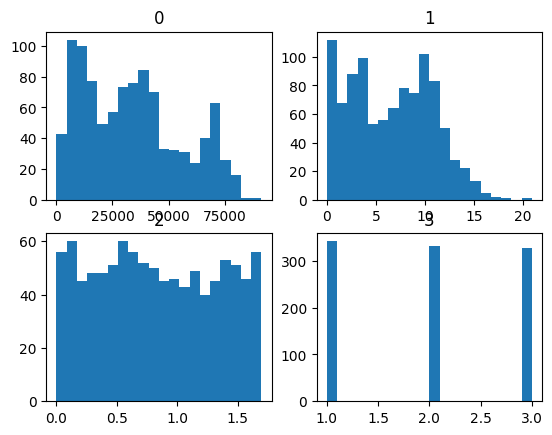

In [28]:
fig, ax = plt.subplots(2, 2)
ax = ax.flatten()
for i, col in enumerate(df_dating.columns):
    ax[i].set_title(col)
    ax[i].hist(df_dating[col], bins=20)

In [4]:
# Own impl
model = kNN.KNNModel(3)
model.fit(X_train, Y_train)
print(f"Accuracy: {model.score_accuracy(X_test, Y_test)}")
%timeit model.classify(X_test)

Accuracy: 0.975
5.07 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
# sklearn impl
scaler = MinMaxScaler()
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(scaler.fit_transform(X_train), Y_train)
print(f"Accuracy: {skmodel.score(scaler.transform(X_test), Y_test)}")
%timeit skmodel.predict(scaler.transform(X_test))

Accuracy: 0.975
1.44 ms ± 75.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
if not os.path.exists("data/wine-quality/winequalityN.csv"):
    !kaggle datasets download "rajyellow46/wine-quality" -p "data/"
    !unzip "data/wine-quality.zip" -d "data/wine-quality"

In [8]:
df_wine = pd.read_csv("data/wine-quality/winequalityN.csv")
df_wine = pd.get_dummies(df_wine)
# replace empty cols with mean
for col in df_wine.columns:
    mean_val = df_wine[col].mean()
    df_wine[col].fillna(mean_val, inplace=True)

n = df_wine.count()[0]
ratio = 0.05
n_test = int(n * ratio)
df_wine = df_wine.sample(frac=1, random_state=33)
train_wine, test_wine = df_wine[:-n_test], df_wine[-n_test:]
X_train, Y_train = train_wine.drop(columns=["quality"]).to_numpy(dtype=float), train_wine["quality"].to_numpy()
X_test, Y_test = test_wine.drop(columns=["quality"]).to_numpy(dtype=float), test_wine["quality"].to_numpy()

In [9]:
# own impl
model = kNN.KNNModel(5)
model.fit(X_train, Y_train)
print(f"Accuracy: {model.score_accuracy(X_test, Y_test)}")
%timeit model.classify(X_test)

Accuracy: 0.5432098765432098
352 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
# sklearn impl
scaler = MinMaxScaler()
skmodel = KNeighborsClassifier(n_neighbors=5)
skmodel.fit(scaler.fit_transform(X_train), Y_train)
print(f"Accuracy: {skmodel.score(scaler.transform(X_test), Y_test)}")
%timeit skmodel.predict(scaler.transform(X_test))

Accuracy: 0.5432098765432098
24.2 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
